<a href="https://colab.research.google.com/github/UiinKim/UiinKim/blob/main/%EC%82%AC%EC%A0%84%ED%9B%88%EB%A0%A8%EB%90%9C_%EC%9B%8C%EB%93%9C_%EC%9E%84%EB%B2%A0%EB%94%A9%EC%9C%BC%EB%A1%9C_%EC%9D%98%EB%8F%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Intent Classification ->의도분류
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_train_data.csv", filename="intent_train_data.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_test_data.csv", filename="intent_test_data.csv")
train_data=pd.read_csv('intent_train_data.csv')
test_data=pd.read_csv('intent_test_data.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11784 entries, 0 to 11783
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   intent  11784 non-null  object
 1   label   11784 non-null  object
dtypes: object(2)
memory usage: 184.2+ KB


<Axes: >

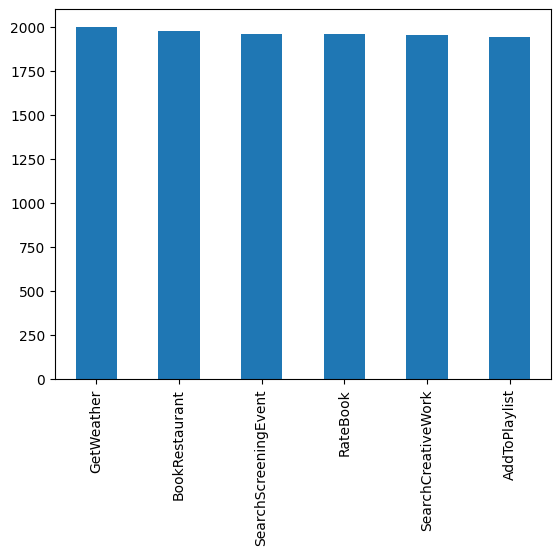

In [5]:
train_data['label'].value_counts().plot(kind='bar')

In [6]:
X_train=train_data['intent'].tolist()
X_test=test_data['intent'].tolist()
y_train=train_data['label'].tolist()
y_test=test_data['label'].tolist()

In [7]:
#레이블 인코딩. 레이블에 고유한 정수 부여(정수 인코딩)
idx_encode=preprocessing.LabelEncoder()
idx_encode.fit(y_train)
y_train=idx_encode.transform(y_train)
y_test=idx_encode.transform(y_test)

In [8]:
label_idx=dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print("레이블과 정수의 관계", label_idx)

레이블과 정수의 관계 {'AddToPlaylist': 0, 'BookRestaurant': 1, 'GetWeather': 2, 'RateBook': 3, 'SearchCreativeWork': 4, 'SearchScreeningEvent': 5}


In [9]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences=tokenizer.texts_to_sequences(X_train)
sequences[:5]

[[11, 191, 61, 4, 1, 4013, 1141, 1572, 15],
 [11, 2624, 1573, 3, 14, 15, 939, 82, 256, 188, 548],
 [11, 187, 42, 2625, 4014, 4, 1968],
 [11, 2626, 22, 2627, 4, 14, 192, 27],
 [11, 92, 4, 14, 651, 520, 195]]

In [10]:
word_to_index=tokenizer.word_index
vocab_size=len(word_to_index)+1
vocab_size

9870

문장의 최대 길이 :  35
문장의 평균 길이 :  9.364392396469789


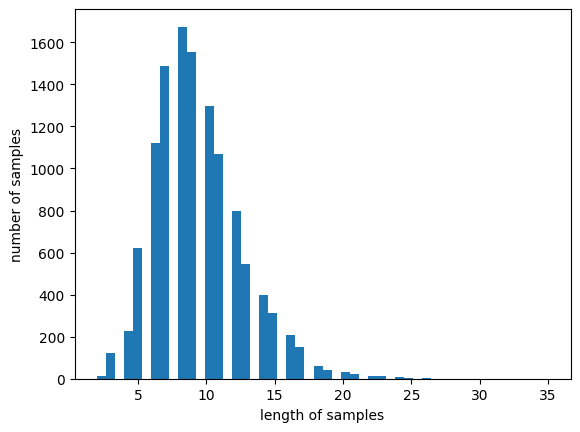

In [11]:
print("문장의 최대 길이 : ", max(len(word)for word in sequences))
print("문장의 평균 길이 : ", sum(map(len, sequences))/len(sequences))
plt.hist([len(s)for s in sequences], bins=50)
plt.xlabel("length of samples")
plt.ylabel("number of samples")
plt.show()

In [12]:
max_len=35
intent_train=pad_sequences(sequences, maxlen=max_len)
label_train=to_categorical(np.asarray(y_train))
print("intent훈련데이터의 크기 : ", intent_train.shape)
print("label훈련데이터의 크기 : ", label_train.shape)

intent훈련데이터의 크기 :  (11784, 35)
label훈련데이터의 크기 :  (11784, 6)


In [13]:
indices=np.arange(intent_train.shape[0]) #행들에 대한 정렬
print(indices)
np.random.shuffle(indices)
print(indices)

[    0     1     2 ... 11781 11782 11783]
[6533    0 3412 ... 3223 6789 3943]


In [14]:
intent_train=intent_train[indices] #훈련데이터를 섞어준다.
label_train=label_train[indices]

In [15]:
n_of_val=int(0.1*intent_train.shape[0]) #검증데이터 개수 -> intent_train의 10%를 사용한다.(행 단위로)
print("검증데이터의 개수 : ", n_of_val)

검증데이터의 개수 :  1178


In [16]:
X_train=intent_train[:n_of_val]
y_train=label_train[:n_of_val]
X_val=intent_train[n_of_val:]
y_val=label_train[n_of_val:]

In [17]:
X_test=np.asarray(X_test)
y_test=np.asarray(y_test)

In [18]:
print("훈련 데이터의 크기 : ", X_train.shape)
print("검증 데이터의 크기 : ", X_val.shape)
print("테스트 데이터의 크기 : ", len(X_test))
print("훈련 레이블의 크기 : ", y_train.shape)
print("검증 레이블의 크기 : ", y_val.shape)
print("테스트 레이블의 크기 : ", len(y_test))


훈련 데이터의 크기 :  (1178, 35)
검증 데이터의 크기 :  (10606, 35)
테스트 데이터의 크기 :  600
훈련 레이블의 크기 :  (1178, 6)
검증 레이블의 크기 :  (10606, 6)
테스트 레이블의 크기 :  600


In [19]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2023-07-28 06:32:00--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-07-28 06:32:01--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-07-28 06:32:01--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [20]:
embedding_dict=dict()
f=open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')
for line in f:
  word_vector=line.split() #라인별로 나눠서 단어의 벡터들을 나눈다.
  word=word_vector[0]#단어의 0번째 인덱스에는 영어단어가 들어있다.
  word_vector_arr=np.asarray(word_vector[1:], dtype='float32')#인덱스 1부터는 벡터들이 담겨있따.
  embedding_dict[word]=word_vector_arr#단어 사전을 만든다.
f.close()

print("%s개의 Embedding vector가 있습니다."%len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [21]:
len(embedding_dict['respectable'])

100

In [23]:
embedding_dim=100
embedding_matrix=np.zeros((vocab_size, embedding_dim))
print("임베딩 테이블의 크기 : ", embedding_matrix.shape)

임베딩 테이블의 크기 :  (9870, 100)


In [24]:
for word, index in word_to_index.items():
  embedding_vector=embedding_dict.get(word)
  if embedding_vector is not None:
    embedding_matrix[index]=embedding_vector

In [26]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPool1D, Dense, Input, Flatten, Concatenate

kernel_size=[2,3,5]
num_filters=512
dropout_ratio=0.5

model_input=Input(shape=(max_len))
output=Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)(model_input)

conv_blocks=[]

for size in kernel_size:
  conv=Conv1D(filters=num_filters, kernel_size=size, padding='valid', activation='relu', strides=1)(output)
  conv=GlobalMaxPool1D()(conv)
  conv_blocks.append(conv)

output=Concatenate()(conv_blocks) if len(conv_blocks)>1 else conv_blocks[0]
output=Dropout(dropout_ratio)(output)
model_output=Dense(len(label_idx), activation='softmax')(output)
model=Model(model_input, model_output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 35, 100)      987000      ['input_2[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 34, 512)      102912      ['embedding_1[0][0]']            
                                                                                                  
 conv1d_1 (Conv1D)              (None, 33, 512)      154112      ['embedding_1[0][0]']            
                                                                                              

In [27]:
history=model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
19/19 [==============================] - 14s 649ms/step - loss: 0.8729 - acc: 0.7012 - val_loss: 0.2816 - val_acc: 0.9190
Epoch 2/10
19/19 [==============================] - 15s 823ms/step - loss: 0.1674 - acc: 0.9567 - val_loss: 0.1363 - val_acc: 0.9670
Epoch 3/10
19/19 [==============================] - 17s 950ms/step - loss: 0.0953 - acc: 0.9779 - val_loss: 0.1161 - val_acc: 0.9718
Epoch 4/10
19/19 [==============================] - 24s 1s/step - loss: 0.0585 - acc: 0.9864 - val_loss: 0.0999 - val_acc: 0.9735
Epoch 5/10
19/19 [==============================] - 24s 1s/step - loss: 0.0401 - acc: 0.9949 - val_loss: 0.1011 - val_acc: 0.9716
Epoch 6/10
19/19 [==============================] - 16s 874ms/step - loss: 0.0258 - acc: 0.9992 - val_loss: 0.0893 - val_acc: 0.9751
Epoch 7/10
19/19 [==============================] - 24s 1s/step - loss: 0.0209 - acc: 0.9992 - val_loss: 0.0847 - val_acc: 0.9768
Epoch 8/10
19/19 [==============================] - 24s 1s/step - loss: 0.0168

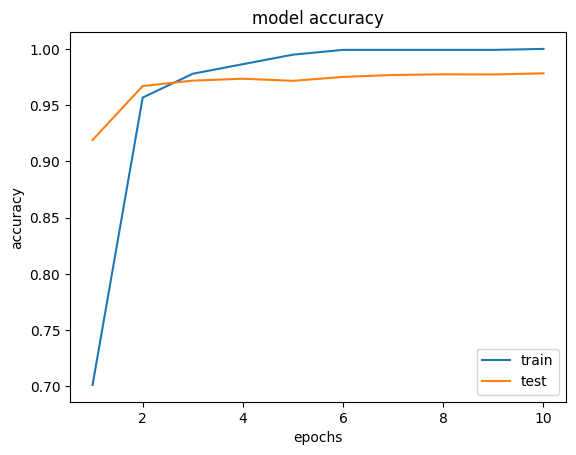

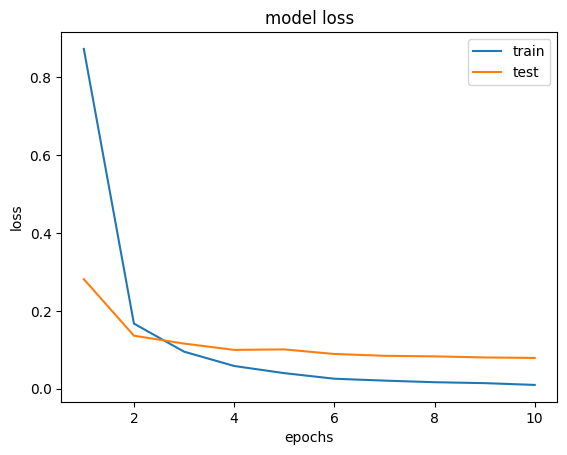

In [28]:
epochs=range(1,len(history.history['acc'])+1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

epochs=range(1,len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [29]:
X_test=tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test, maxlen=max_len)

In [31]:
y_predict=model.predict(X_test)
y_predict=y_predict.argmax(axis=-1) #가장 큰 값을 추출

19/19 [==============================] - 1s 42ms/step


In [33]:
print('정확도 : ', sum(y_predict==y_test)/len(y_test)*100)

정확도 :  97.5
